<a href="https://colab.research.google.com/github/AsifShaafi/Deep-Learning-Course-Examples/blob/main/RNN_Examples/StockPricePrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Futile Stock Price Prediction with LSTM and GRU

This project predicts stock prices based on historical financial data using RNN LSTM.  It is a good practice of LSTM but does absolutely nothing for financial speculation as I believe stock prices follow a random walk process.


In [ ]:
# !pip install --upgrade pandas
# !pip install --upgrade pandas-datareader
!pip install yfinance

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 315.3/315.3 kB 1.3 MB/s eta 0:00:0000:0100:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 1.5 MB/s eta 0:00:0000:0100:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.0/73.0 kB 1.5 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.2/112.2 kB 1.4 MB/s eta 0:00:00 0:00:01
  Created wheel for frozendict: filename=frozendict-2.4.2-cp311-cp311-macosx_11_0_arm64.whl size=15503 sha256=474c6135a08c6ecae69509218f24ce2b238e4d576997f65ffecc4848b63b7c44
  Stored in directory: /Users/asifimtiazshaafi/Library/Caches/pip/wheels/b6/d6/b5/da9ad65b3c11d2d2f3245b0b2476231dc58a2a91768c5ec755
  Created wheel for peewee: filename=peewee-3.17.3-cp311-cp311-macos

After you upgraded pandas and pandas-datareader, restart runtime before excuting the following codes.

In [ ]:
import math
# import pandas_datareader as web
import yfinance as yf
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, GRU
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [ ]:
# Get the stock quote
df = yf.download('PFE', start='2010-01-01', end='2024-02-20')
print(df.head())

[*********************100%%**********************]  1 of 1 completed

                 Open       High        Low      Close  Adj Close    Volume
Date                                                                       
2010-01-04  17.333965  17.969639  17.305504  17.960152  10.487244  54898644
2010-01-05  17.950665  17.960152  17.599621  17.703985  10.337666  45714931
2010-01-06  17.703985  17.846300  17.561670  17.647058  10.304420  43640975
2010-01-07  17.685009  17.713472  17.514231  17.580645  10.265642  41557112
2010-01-08  17.666035  17.751423  17.571157  17.722960  10.348742  32049716


(3555, 6)


<function matplotlib.pyplot.show(close=None, block=None)>

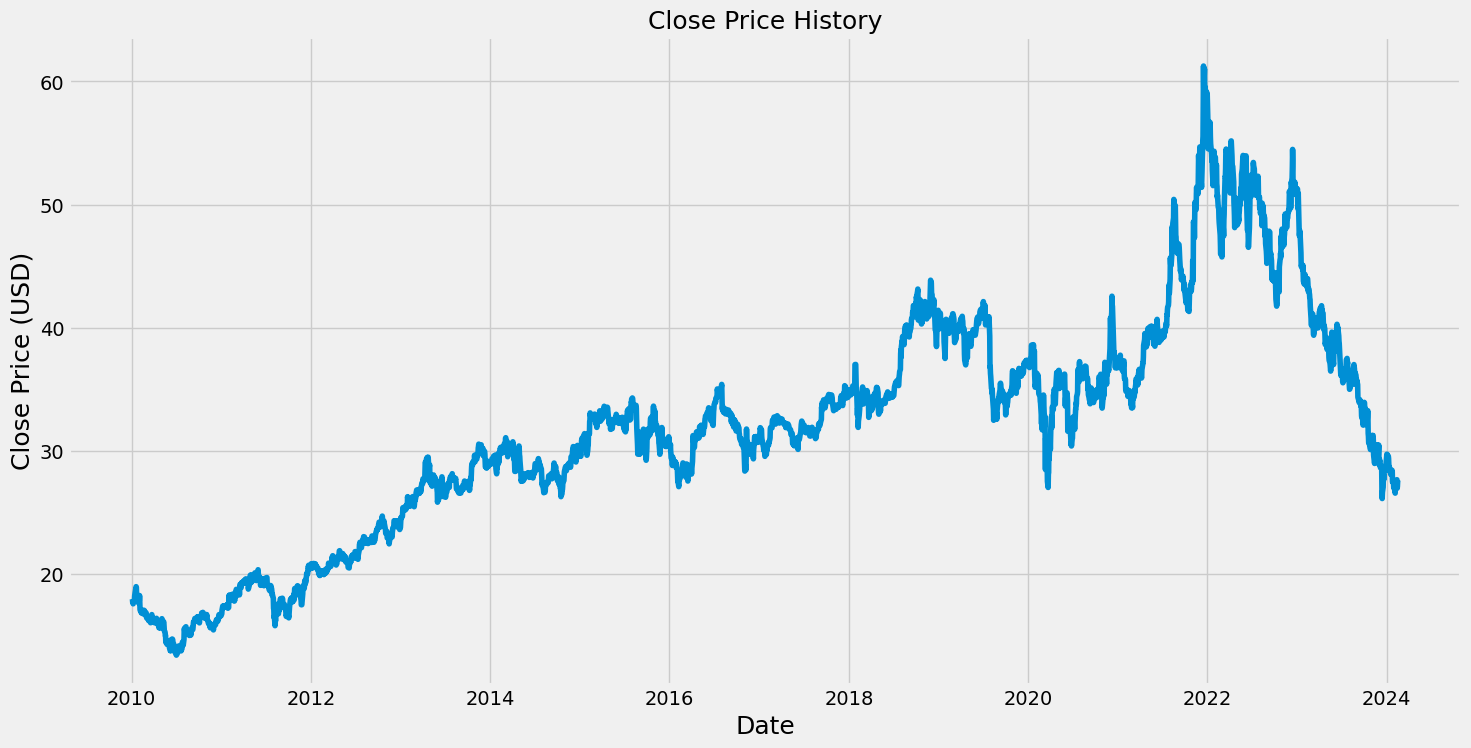

In [ ]:
# Get the number of rows and columns in the data set
print(df.shape)
# Visualize the closing price history
plt.figure(figsize=(16,8))
plt.plot(df['Close'])
plt.title('Close Price History', fontsize=18)
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price (USD)', fontsize=18)
plt.show

In [ ]:
# Create a new dataframe with only the Close column
data = df.filter(['Close'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = math.ceil(len(dataset)*.8)
print(training_data_len)

2844


In [ ]:
# Scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
print(len(scaled_data))
print(scaled_data)

3555
[[0.09500669]
 [0.08965142]
 [0.08846134]
 ...
 [0.28628831]
 [0.29465047]
 [0.29695008]]


In [ ]:
# Create the training dataset
# Create the scaled training dataset
train_data = scaled_data[0:training_data_len, :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

sequence_len = 80

for i in range(sequence_len, len(train_data)):
  x_train.append(train_data[i-sequence_len:i, 0])
  y_train.append(train_data[i, 0])
  if i<=sequence_len+1:
    print(x_train)
    print(y_train)
    print()

[array([0.09500669, 0.08965142, 0.08846134, 0.08707293, 0.09004809,
       0.09302324, 0.0918332 , 0.1005603 , 0.10393216, 0.10611394,
       0.11622949, 0.11503941, 0.10115534, 0.09560173, 0.09341995,
       0.09203154, 0.0963951 , 0.08905638, 0.08965142, 0.09222987,
       0.10115534, 0.08885805, 0.07715576, 0.07576735, 0.07338723,
       0.0741806 , 0.07140378, 0.07398223, 0.07259386, 0.07100707,
       0.07001537, 0.07120545, 0.07636238, 0.07556901, 0.07001537,
       0.07279219, 0.07041207, 0.06763525, 0.07160211, 0.06862696,
       0.06307335, 0.06327168, 0.06624684, 0.06366839, 0.06128823,
       0.05970149, 0.06247831, 0.05831308, 0.06188327, 0.06188327,
       0.06089157, 0.06128823, 0.05494126, 0.05970149, 0.06743688,
       0.06882533, 0.06446172, 0.05950316, 0.06227998, 0.06188327,
       0.05970149, 0.05831308, 0.05474292, 0.05593296, 0.05811474,
       0.05950316, 0.06168494, 0.06247831, 0.06029653, 0.05811474,
       0.056528  , 0.05275945, 0.05256112, 0.05196608, 0.0487

In [ ]:
type(x_train)

list

In [ ]:
# Convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)
display(type(x_train))
display(x_train.shape)

# Reshape the data for the LSTM model
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
display(x_train.shape[1])

numpy.ndarray

(2764, 80)

80

**Long Short Term Memory (LSTM) Network**

<!-- ![alt text](http://colah.github.io/images/post-covers/lstm.png) -->
![alt text](https://www.researchgate.net/profile/Savvas-Varsamopoulos/publication/329362532/figure/fig5/AS:699592479870977@1543807253596/Structure-of-the-LSTM-cell-and-equations-that-describe-the-gates-of-an-LSTM-cell.jpg)


**Gated Recurrent Unit (GRU)**

![alt text](https://upload.wikimedia.org/wikipedia/commons/thumb/3/37/Gated_Recurrent_Unit%2C_base_type.svg/2880px-Gated_Recurrent_Unit%2C_base_type.svg.png)

Initially, for $t=0$, the output vector is $h_{0}=0$.

\begin{aligned}z_{t}&=\sigma _{g}(W_{z}x_{t}+U_{z}h_{t-1}+b_{z})\\r_{t}&=\sigma _{g}(W_{r}x_{t}+U_{r}h_{t-1}+b_{r})\\{\hat {h}}_{t}&=\phi _{h}(W_{h}x_{t}+U_{h}(r_{t}\odot h_{t-1})+b_{h})\\h_{t}&=(1-z_{t})\odot h_{t-1}+z_{t}\odot {\hat {h}}_{t}\end{aligned}

where, the operator $\odot$  denotes the Hadamard product.

Variables
- $x_{t}$: input vector
- $h_{t}$: output vector
- $\hat{h}_{t}$: candidate activation vector
- $z_{t}$: update gate vector
- $r_{t}$: reset gate vector
- $W$, $U$ and $b$: parameter matrices and vector


Activation functions
- $\sigma _{g}$: The original is a sigmoid function.
- $\phi _{h}$: The original is a hyperbolic tangent.



In [ ]:
# Build the LSTM and GRU model
model = Sequential()
model.add(LSTM(80, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(GRU(80, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 80, 80)            26240     
                                                                 
 gru (GRU)                   (None, 80)                38880     
                                                                 
 dense (Dense)               (None, 25)                2025      
                                                                 
 dense_1 (Dense)             (None, 1)                 26        
                                                                 
Total params: 67171 (262.39 KB)
Trainable params: 67171 (262.39 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=10)

Epoch 1/10
2764/2764 [==============================] - 56s 20ms/step - loss: 5.7114e-04
Epoch 2/10
2764/2764 [==============================] - 52s 19ms/step - loss: 2.3715e-04
Epoch 3/10
2764/2764 [==============================] - 52s 19ms/step - loss: 1.9157e-04
Epoch 4/10
2764/2764 [==============================] - 51s 19ms/step - loss: 1.8306e-04
Epoch 5/10
2764/2764 [==============================] - 52s 19ms/step - loss: 1.7344e-04
Epoch 6/10
2764/2764 [==============================] - 52s 19ms/step - loss: 1.6539e-04
Epoch 7/10
2764/2764 [==============================] - 53s 19ms/step - loss: 1.5180e-04
Epoch 8/10
2764/2764 [==============================] - 52s 19ms/step - loss: 1.4212e-04
Epoch 9/10
2764/2764 [==============================] - 137s 50ms/step - loss: 1.5090e-04
Epoch 10/10
2764/2764 [==============================] - 58s 21ms/step - loss: 1.3898e-04


In [ ]:
# Create the testing data set
# Create a new array containing scaled values indexed from (training_data_len - sequence_len) to the end.
test_data = scaled_data[training_data_len - sequence_len:, :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]

for i in range(sequence_len, len(test_data)):
  x_test.append(test_data[i-sequence_len:i, 0])

In [ ]:
# Convert the data to a numpy array
x_test = np.array(x_test)

In [ ]:
# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [ ]:
# Get the model's predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

23/23 [==============================] - 1s 16ms/step


In [ ]:
# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(predictions - y_test)**2)
print(rmse)

0.24887438531331038


/var/folders/42/v3dh5sdx3tvgnrq4l18d_2rc0000gn/T/ipykernel_5749/379670300.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


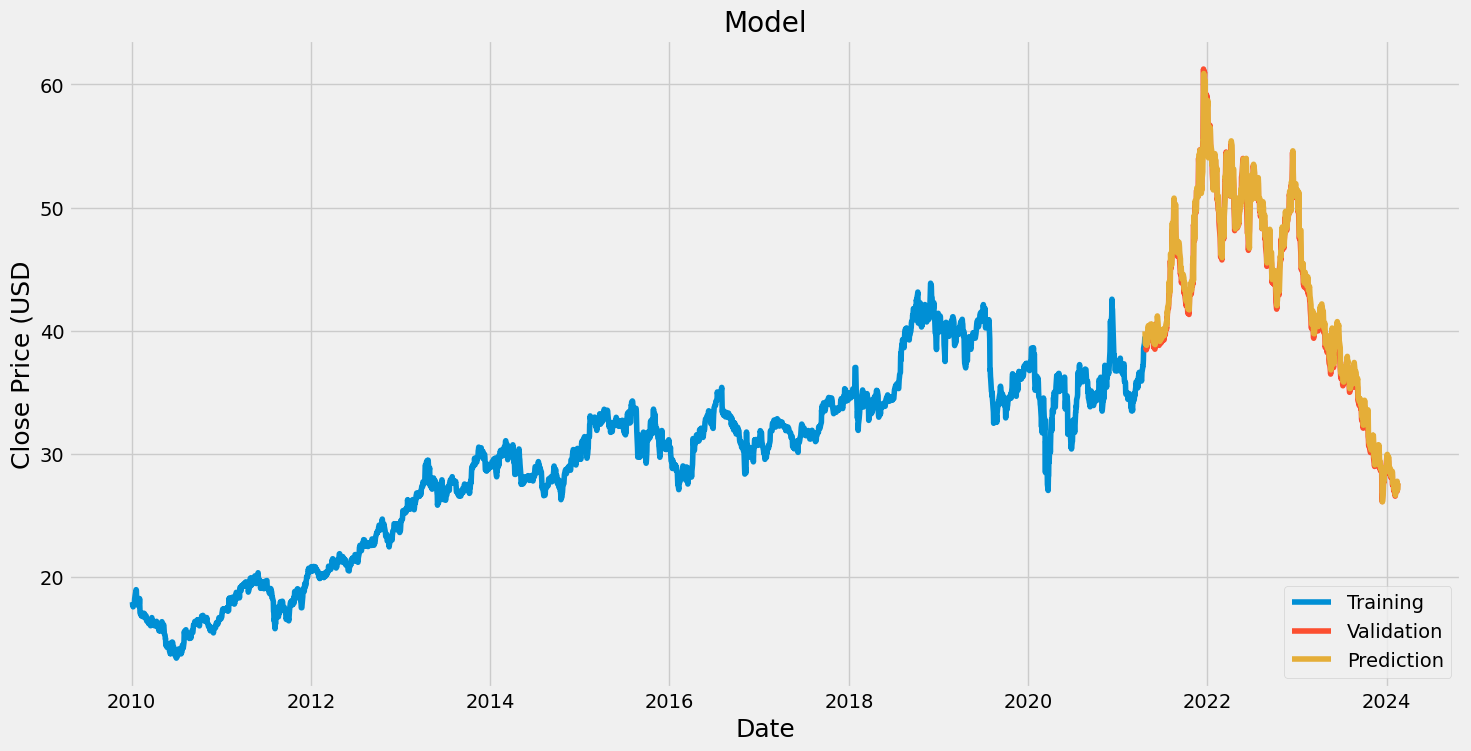

In [ ]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

# Visulize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price (USD', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Training', 'Validation', 'Prediction'], loc='lower right')
plt.show()

In [ ]:
# Show the valid and predicted prices
print(valid)

                Close  Predictions
Date                              
2021-04-22  38.639999    39.952305
2021-04-23  38.660000    38.947914
2021-04-26  38.680000    38.997288
2021-04-27  38.450001    39.039993
2021-04-28  38.810001    38.817440
...               ...          ...
2024-02-12  27.660000    27.671301
2024-02-13  26.969999    27.777655
2024-02-14  27.110001    27.058378
2024-02-15  27.510000    27.177935
2024-02-16  27.620001    27.618359

[711 rows x 2 columns]


In [ ]:
# Get the quote
# test_quote = web.DataReader('PFE', data_source='yahoo', start='2010-01-01', end='2021-10-20')
test_quote = yf.download('PFE', start='2010-01-01', end='2023-02-20')

# Create a new dataframe
new_df = test_quote.filter(['Close'])
# Get the last 80 day closing price values and convert the dataframe to an array


last_80_days = new_df[-80:].values
# Scale the data to be values between 0 and 1
last_80_days_scaled = scaler.transform(last_80_days)
# Create an empty list
X_test = []
# Append the past 80 days
X_test.append(last_80_days_scaled)
# Convert the X_test data set to a numpy array
X_test = np.array(X_test)
# Reshape the data
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
# Get the predicted scaled price
pred_price = model.predict(X_test)
# Inverse scaling
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

[*********************100%%**********************]  1 of 1 completed

1/1 [==============================] - 0s 14ms/step
[[43.59742]]
